# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Load the data

In [11]:
df = pd.read_csv('london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Part 1) make a datetime index

## Convert the date column to datetime dtype

In [14]:
#reformat and change to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [16]:
#check the dtype
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Set the date column as the index

In [17]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


## Filter out only the required data:
- keep only data from the year 2000 or later
- keep only the following features: precipitation, mean_temp, min_temp, max_temp, and snow_depth

In [18]:
#filter to keep the years 2000 and later
df = df.loc['2000':'2020']
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [23]:
#drop columns: cloud_cover, sunshine, global_radiation, and pressure
df = df.drop(['cloud_cover', 'sunshine', 'global_radiation', 'pressure'], axis=1)
df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


## Impute any missing values

In [25]:
#find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 617.6 KB


In [29]:
#impute all with interpolation
df = df.interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 617.6 KB


# Part 2) answer the stakeholder questions with visualizations

## Q1: What month had the most precipitation between 2000 and 2010?

In [30]:
#create a copy of the data frame to have only the years from 2000-2010
pr = df.loc['2000':'2010']
pr

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2010-12-27,8.0,0.2,-4.6,5.0,1.0
2010-12-28,9.5,5.3,2.5,0.4,0.0
2010-12-29,7.7,6.8,4.1,1.4,0.0


In [32]:
#drop every column but the precipitation column
pr = pr.drop(['max_temp', 'mean_temp', 'min_temp', 'snow_depth'], axis=1)
pr

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [33]:
#resample the precipitation column to a monthly frequency using .sum() as the aggregation method
pr = pr.resample("MS").sum()
pr.name = 'Resampled'
pr.head()

,precipitation
date,
2000-01-01,14.5
2000-02-01,64.8
2000-03-01,13.9
2000-04-01,82.5
2000-05-01,78.0


In [35]:
#find the date and corresponding value for the max precipitation
max_pre = pr.idxmax()
pr.loc[max_pre]

,precipitation
date,
2000-10-01,152.7


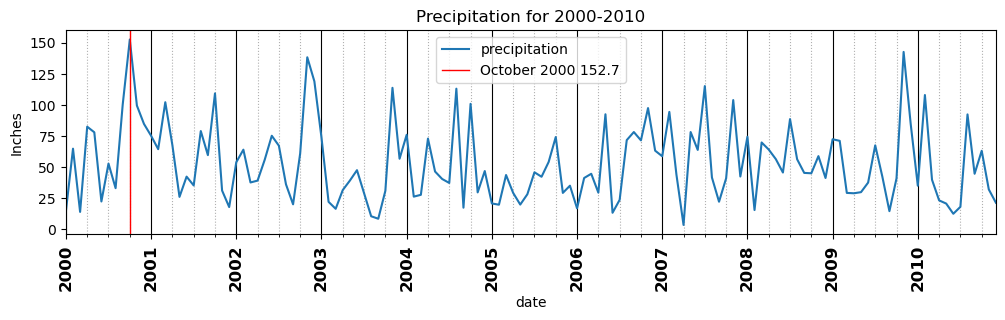

In [57]:
fig, ax = plt.subplots(figsize=(12,3))
pr.plot(ax=ax,title='Precipitation for 2000-2010',ylabel='Inches');
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ); 
ax.axvline("2000-10-01",color='red',lw=1, label='October 2000 152.7')
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend();

### The month of October in the year 2000 had the most precipitation from the years 2000-2010 with a precipitation of 152.7 inches

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [39]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

TypeError: YearLocator.__init__() got an unexpected keyword argument 'interval'

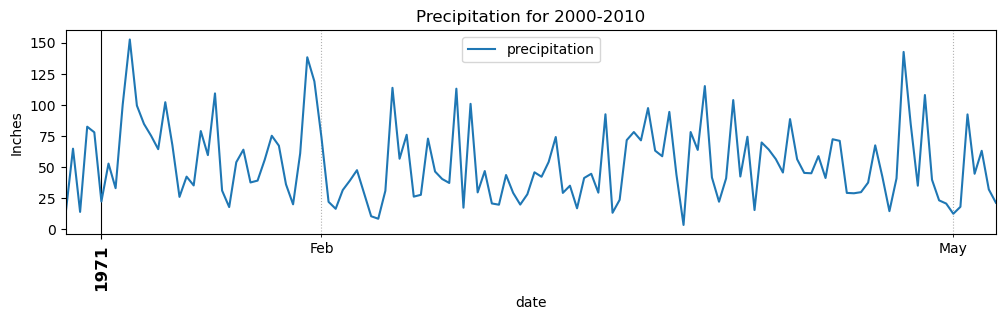

In [38]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
pr.plot(ax=ax,title='Precipitation for 2000-2010',ylabel='Inches');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
